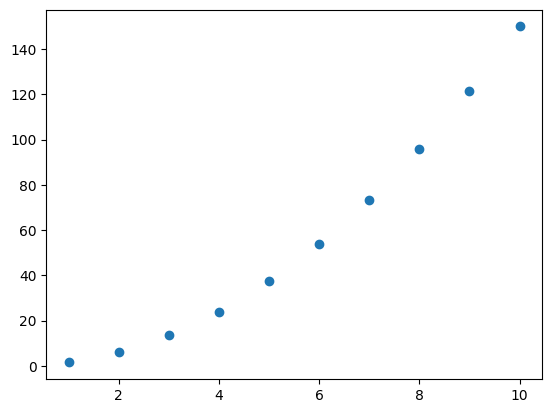

In [1]:
import sympy as smp
import numpy as np
import matplotlib.pyplot as plt
from sympy import assoc_laguerre

R , R_10 , R_nl , σ = smp.symbols('R R_10 R_nl σ')
r , a = smp.symbols('r a' , real = True , positive = True)
n , l = smp.symbols ('n l' , integer = True , positive = True)


R = (
    smp.sqrt(
        ((2 / (n * a))**3 * smp.factorial(n - l - 1)) /
        (2 * n * smp.factorial(n + l))
    )
    * smp.exp(-r / (n * a))
    * ((2 * r / (n * a))**l)
    * smp.assoc_laguerre(n - l - 1, 2 * l + 1, 2 * r / (n * a))
)

#Ground state of hydrogen 
R_10 = R.subs([(n , 1),(l , 0)])


#Calculating the integral : mean radial distance of an electron in state w100

def compute_int(n_val, l_val, k):
    # Substitute n and l values into R
    R_nl = R.subs([(n, n_val), (l, l_val)])
    # Perform the integration
    integral = smp.integrate(R_nl**2 * r**k, (r, 0, smp.oo))
    # Return the computed integral
    return integral


# Compute the spread in distances of the electron in state w100
σ = smp.sqrt(
    compute_int(n_val=1, l_val=0, k=4) - (compute_int(n_val=1, l_val=0, k=3)**2)
)

def compute_mean_distance(n_val, l_val=0):
    expr = compute_int(n_val,l_val,k=3)
    expr_f = smp.lambdify([a], expr)
    return expr_f(1)


ns = np.arange(1,11)
ds =[compute_mean_distance(ni) for ni in ns]

plt.scatter(ns, ds)
